In [92]:
%matplotlib inline
from matplotlib import rcParams

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Introduction to clustering

Clustering is a machine learning technique used to group unlabeled datapoints in groups called *clusters*. The grouping is done such that similar items are together in the same cluster and items in different clusters are dissimilar from each-other. Typically similarity is defined using a distance measure (Euclidean, cosine, etc). Common practical applications for clustering include: market segmentation, social network analysis, search result grouping, anomaly detection etc.


Two clustering methods will be explored in this notebook:

- K-means.
- Hierarchical clustering.

More methods can be found [here](https://scikit-learn.org/stable/modules/classes.html?highlight=cluster#module-sklearn.cluster).

#### To begin with
Get familiar with how clustering works by watching the videos in Resources A and reading the article in Resources B.


#### Resources: 

* A. Introduction to clustering:
    * https://www.youtube.com/watch?v=4cxVDUybHrI
    
    
* B. A Comprehensive Survey of Clustering Algorithms
    * https://link.springer.com/article/10.1007/s40745-015-0040-1 (Read everything until the section Traditional Clustering Algorithms. From the section Traditional Clustering Algorithms, read the first 2 subsections. You can skip Modern Traditional Clustering Algorithms.)



* C. K-means clustering:
     * https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
     
     * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)
     
     
* D. Hierarchical clustering:
    * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
    * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
    * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering 

### Subject comprehension 

To check your understanding, before moving further, answer the questions in your own words in the space below.

1. What is clustering?
2. What are the main steps in the standard process of clustering?
3. What is the Silhouette coefficient?
4. What are the two types of evaluation for a clustering algorithm and what is the difference between them?

1. Clustering: 
Le clustering est une technique d'apprentissage automatique non supervisée qui consiste à regrouper un ensemble de points de données en clusters de sorte que les points dans le même cluster soient plus similaires les uns aux autres qu'à ceux des autres clusters. L'objectif est de découvrir la structure inhérente aux données en identifiant des regroupements naturels.

2. Les principales étapes du processus standard de clustering incluent généralement :
- Prétraitement des données : Nettoyer les données, gérer les valeurs manquantes et mettre les caractéristiques à l'échelle pour assurer leur comparabilité.
- Choix de l'algorithme de clustering : Sélectionner un algorithme de clustering approprié tel que K-means, le clustering hiérarchique, DBSCAN, etc.
- Détermination du nombre de clusters : Décider du nombre optimal de clusters, souvent à l'aide de méthodes comme la méthode du coude ou l'analyse de silhouette.
- Application de l'algorithme de clustering : Exécuter l'algorithme choisi sur les données prétraitées.
- Évaluation des clusters : Évaluer la qualité des clusters à l'aide de métriques d'évaluation comme le coefficient de silhouette, l'indice de Davies-Bouldin, etc.
- Interprétation des résultats : Analyser les clusters formés pour obtenir des insights et prendre des décisions basées sur les modèles découverts.

3. Le coefficient de silhouette est une mesure utilisée pour évaluer la qualité d'un clustering. Il calcule à quel point un point de données est similaire à son propre cluster comparé aux autres clusters. Le coefficient varie de -1 à 1, où une valeur proche de 1 indique que le point est bien clusterisé, une valeur proche de 0 indique que le point est sur ou très proche de la frontière entre les clusters, et une valeur négative indique que le point pourrait avoir été assigné au mauvais cluster.

4.  Évaluation interne : Ce type d'évaluation évalue la qualité du clustering en se basant sur les données clusterisées sans référence externe. Des métriques comme le coefficient de silhouette, l'indice de Davies-Bouldin, et la somme des carrés intra-clusters (WCSS) sont couramment utilisées. L'évaluation interne se concentre sur la compacité et la séparation des clusters.
 Évaluation externe : Ce type d'évaluation compare les résultats du clustering à une vérité terrain ou référence externe. Des métriques comme l'indice de Rand ajusté (ARI), l'information mutuelle normalisée (NMI), et l'indice de Fowlkes-Mallows sont utilisées. L'évaluation externe mesure à quel point les résultats du clustering correspondent aux labels ou catégories pré-définis.
La différence principale entre elles est que l'évaluation interne repose uniquement sur les données clusterisées et ne nécessite aucune information externe, tandis que l'évaluation externe utilise des labels pré-définis pour évaluer la précision et la pertinence des clusters.








### Data acquisition

Load the data about bank clients from the *bank-full.csv* file into a pandas dataframe. Make the necessary imports.

In [94]:
# code here
df= pd.read_csv('E:/Clustering/data/bank-full.csv', sep=';')

Print a summary of the data as well as the first 5 rows.

In [95]:
# code here
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Preprocessing

To facilitate the computation of distances, keep only the numerical features in the dataset.

- Remove all non-numerical features, as well as the features related to the date.
- Make sure there are no missing values - if they exist, remove them.
- Normalize the new dataset (transform the data for multiple features to the same scale).
- Save the result in a dataframe *df_norm*

In [96]:
# code here
numeric_=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df= df.select_dtypes(include=numeric_)
df.drop(columns=["day"], inplace = True)
df.head(5)

,age,balance,duration,campaign,pdays,previous
0,58,2143,261,1,-1,0
1,44,29,151,1,-1,0
2,33,2,76,1,-1,0
3,47,1506,92,1,-1,0
4,33,1,198,1,-1,0


In [97]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


Plot histograms of features

In [98]:
# code here
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np


In [99]:
num_pipeline= Pipeline([('std_scaler', StandardScaler())])
scaled_features= num_pipeline.fit_transform(df)
scaled_features

array([[ 1.60696496,  0.25641925,  0.0110161 , -0.56935064, -0.41145311,
        -0.25194037],
       [ 0.28852927, -0.43789469, -0.41612696, -0.56935064, -0.41145311,
        -0.25194037],
       [-0.74738448, -0.44676247, -0.70736086, -0.56935064, -0.41145311,
        -0.25194037],
       ...,
       [ 2.92540065,  1.42959305,  3.37379688,  0.72181052,  1.43618859,
         1.05047333],
       [ 1.51279098, -0.22802402,  0.97014641,  0.39902023, -0.41145311,
        -0.25194037],
       [-0.37068857,  0.52836436,  0.39932797, -0.24656035,  1.4761376 ,
         4.52357654]])

In [100]:
df_norm= pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
df_norm.describe()

,age,balance,duration,campaign,pdays,previous
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,2.112250e-16,1.760208e-17,6.035001e-17,3.017500e-17,2.011667e-17,4.023334e-17
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.159994e+00,-3.081149e+00,-1.002478e+00,-5.693506e-01,-4.114531e-01,-2.519404e-01
25%,-7.473845e-01,-4.237719e-01,-6.025167e-01,-5.693506e-01,-4.114531e-01,-2.519404e-01
50%,-1.823406e-01,-3.002800e-01,-3.035165e-01,-2.465603e-01,-4.114531e-01,-2.519404e-01
75%,6.652252e-01,2.158743e-02,2.362370e-01,7.622994e-02,-4.114531e-01,-2.519404e-01
max,5.091402e+00,3.309478e+01,1.809470e+01,1.944365e+01,8.297431e+00,1.191360e+02


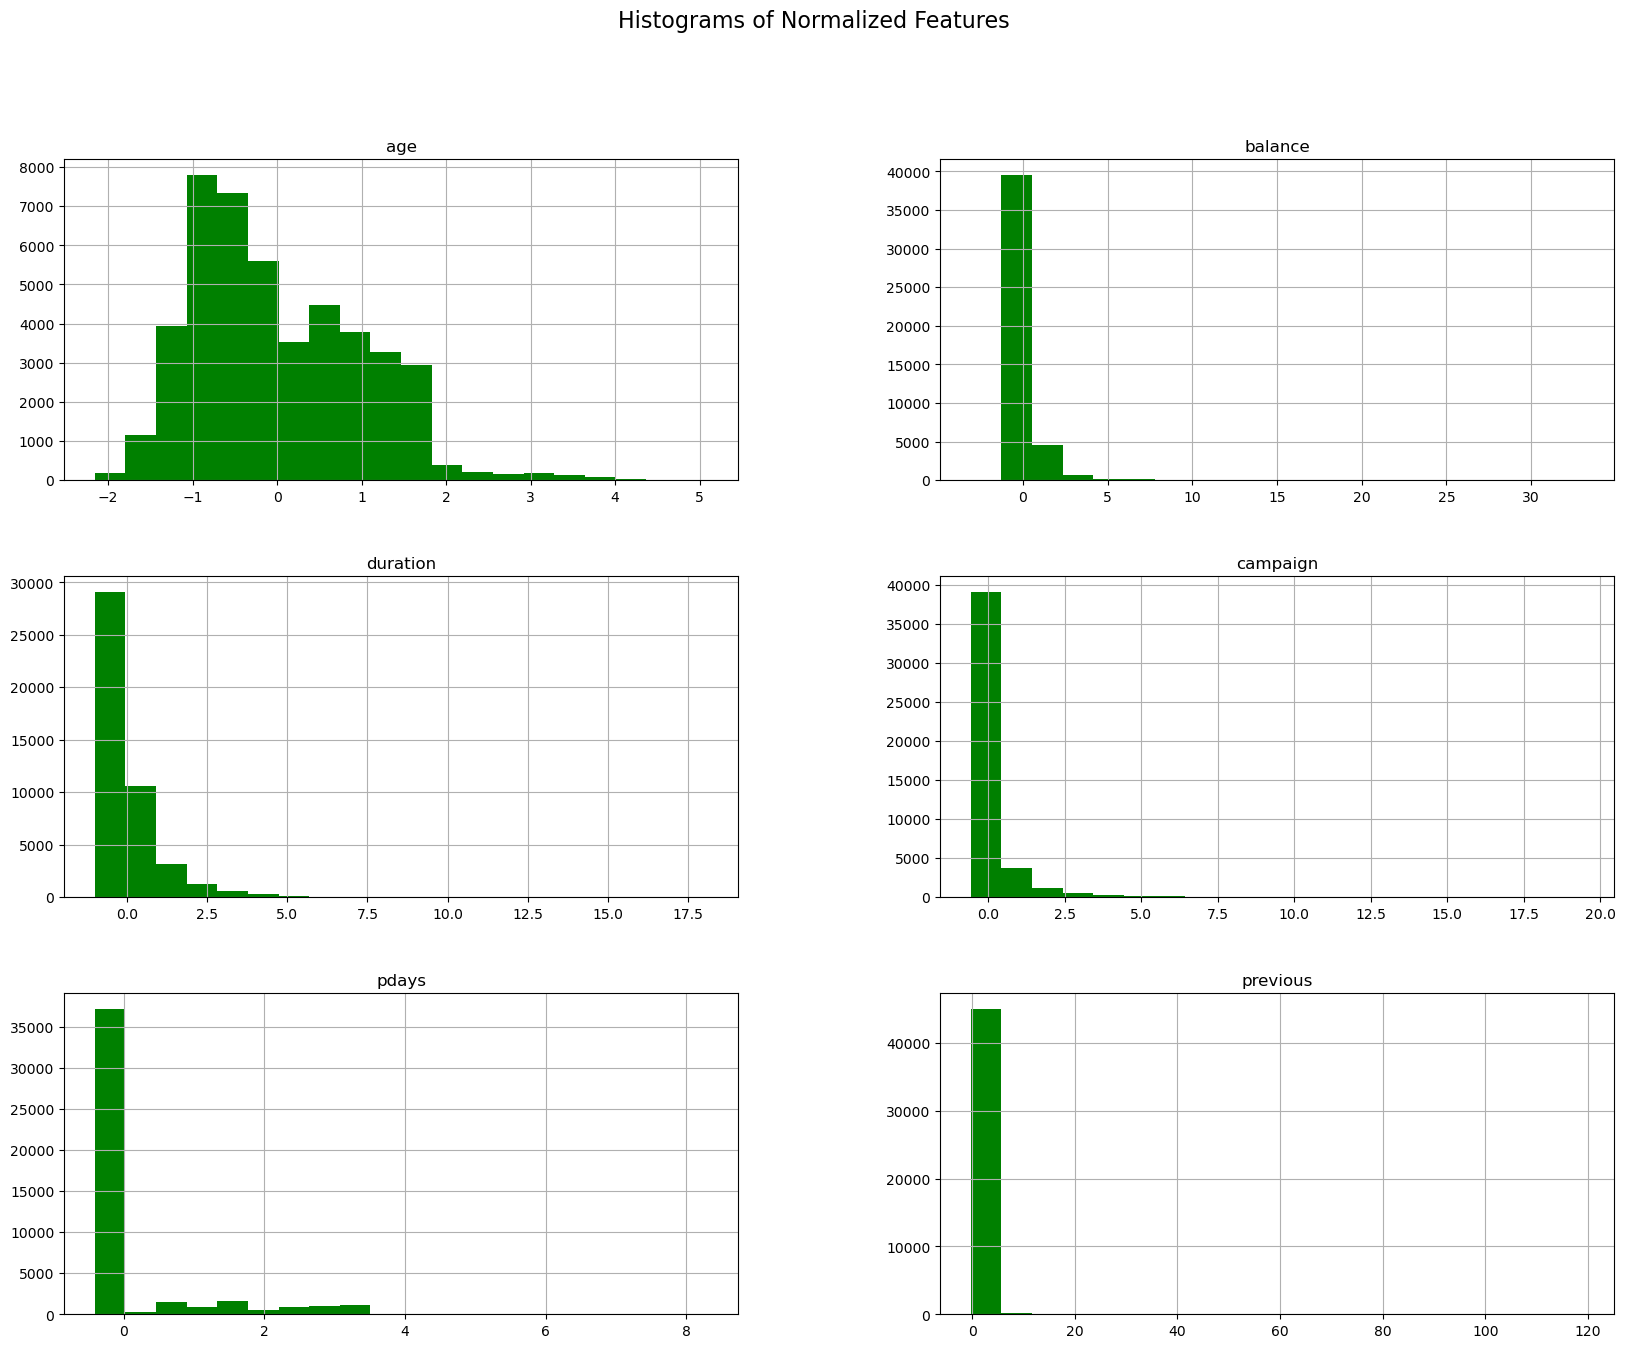

In [101]:
# Plot histograms for each normalized feature:
df_norm.hist(figsize=(20, 15), bins=20, color='green')
plt.suptitle('Histograms of Normalized Features', fontsize=16)
plt.show()

## KMeans


Let's warm up with the well known algorithm named KMeans!

Centroid-based clustering organizes the data into non-hierarchical clusters, contrarily to hierarchical clustering. KMeans is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers. 


To better understand the way the algorithm works, read the documents and watch the video in Resources C:
* https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
* https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)


Then answer the below questions (in your own words):
1. What is a centroid?
2. How can you compute a centroid?
3. Are you supposed to know in advance the number of clusters in order to use the KMeans algorithm?


1. Un centroïde est le point central d'un cluster dans le contexte de l'algorithme KMeans. C'est la position moyenne de tous les points d'un cluster, représentant essentiellement la "moyenne" des points dans ce cluster. Le centroïde sert de point de référence autour duquel les points du cluster sont regroupés.

2. Pour calculer un centroïde, on prend la moyenne de tous les points de données assignés à un cluster particulier. Mathématiquement, pour un cluster 
𝐶  avec des points 𝑥1, 𝑥2, …,𝑥𝑛, le centroïde μ est calculé comme suit :
​μ=1|n|∑n|i=1|xi  où:
 ∑ représente la somme de tous les points de données dans le cluster, et 
n est le nombre de points dans le cluster. Cela signifie calculer la moyenne de chaque caractéristique (dimension) des points du cluster.

3. Oui, il est nécessaire de connaître à l'avance le nombre de clusters pour utiliser l'algorithme KMeans. En effet, l'algorithme nécessite le nombre de clusters, 
𝑘, en tant que paramètre d'entrée avant de commencer le processus de clustering. Déterminer le nombre optimal de clusters peut impliquer l'utilisation de méthodes comme la méthode du coude, l'analyse de silhouette, ou des connaissances spécifiques au domaine pour décider de la valeur de 
𝑘 qui représente le mieux la structure des données.

#### Make the necessary imports from scikit learn in order to perform KMeans clustering

In [102]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#### Exploring KMeans with sklearn

The goal of this step is to become familiar with the sklearn clustering package and the silhouette analysis concepts.

Start by peforming a clustering of the data in *df_norm* into 5 clusters.

In [103]:
df_norm= df_norm.sample(frac=0.1)


In [104]:
# Perform KMeans clustering
nb_clusters= 5
kmeans = KMeans(n_clusters=nb_clusters, random_state=42).fit(df_norm)

c:\Users\lisia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Print the centroids obtained

In [105]:
# Get cluster centers and labels:
kmeans.cluster_centers_

array([[ 0.02014757,  0.10504078,  2.68395443, -0.1127914 , -0.21455727,
        -0.16980617],
       [-0.15294972,  0.02028388, -0.15106604, -0.21702398,  2.19735757,
         1.41792992],
       [ 1.05531564,  0.1561025 , -0.22892155, -0.09022719, -0.33098688,
        -0.18670886],
       [-0.68798102, -0.13736445, -0.23035387, -0.16715991, -0.37496777,
        -0.22064353],
       [-0.11914492, -0.1228229 , -0.533157  ,  3.99430945, -0.41145311,
        -0.25194037]])

Print the cluster labels assigned to each point

In [106]:
kmeans.labels_

array([2, 3, 2, ..., 2, 4, 2])

### **Visualization**

Let's try to visualize the created clusters. As it is easier to visualize 2-dimensional data, first run PCA on the data. Then create a scatterplot to visualize the clustered points, each coloured differently depending on the cluster they belong to.

In [107]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


### Evaluation

**Inertia** can be a measure of how internally coherent clusters are. It represents the within-cluster sum-of-squares.

Read more about it here:
https://scikit-learn.org/stable/modules/clustering.html#k-means 

Print the inertia obtained after the clustering.

In [108]:
# Create a DataFrame with PCA results and cluster labels
# Run PCA to reduce the data to 2 dimensions
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_norm)
principalDF = pd.DataFrame(data=reduced_data, columns= ['pc 1','pc 2'])
principalDF['cluster label'] = kmeans.labels_
principalDF

,pc 1,pc 2,cluster label
0,-0.321233,0.771761,2
1,-0.593442,-0.753890,3
2,-0.157623,0.497547,2
3,-0.419015,0.833589,2
4,-0.650726,-1.105153,3
...,...,...,...
4516,-0.522808,-0.370187,3
4517,-0.403681,-0.313701,3
4518,-0.413552,0.065132,2
4519,-1.004683,-0.377348,4


In [125]:
def scatter_plot1(principalDF, title):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('component 1 ',fontsize = 15)
    ax.set_ylabel('component 2 ',fontsize = 15)
    ax.set_title(title, fontsize = 20)

    ax.scatter(principalDF.iloc[:,0], principalDF.iloc[:,1],c = principalDF.iloc[:,2])
    ax.grid()
    
    # Créer une palette de couleurs basée sur le nombre de clusters
    num_clusters = principalDF['cluster label'].nunique()
    custom_palette = sns.color_palette("husl", n_colors=num_clusters)

    # Mapper les couleurs aux labels des clusters
    cluster_labels = principalDF['cluster label'].astype(int)
    scatter_colors = [custom_palette[label] for label in cluster_labels]

    # Tracer les points avec les couleurs des clusters
    ax.scatter(principalDF['pc 1'], principalDF['pc 2'], c=scatter_colors, s=50, alpha=0.7, edgecolors='w')
    
    # Ajouter une légende
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=custom_palette[i], markersize=10, label=f'Cluster {i}') for i in range(num_clusters)]
    ax.legend(handles=handles, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    ax.grid(True)
    plt.show()




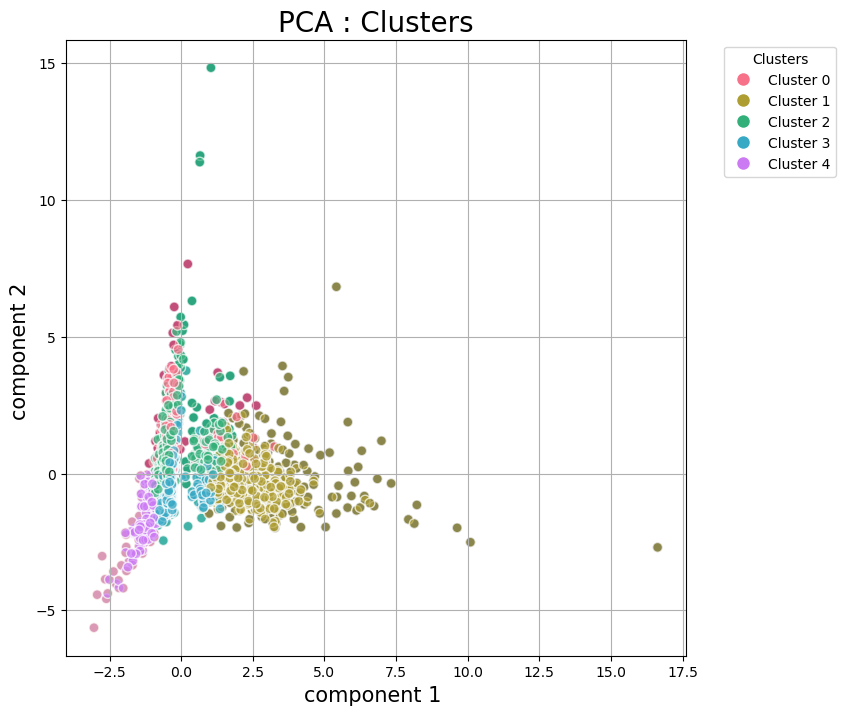

In [126]:
scatter_plot1(principalDF, 'PCA : Clusters')

# TSNE and PLOT

In [111]:
from sklearn.manifold import TSNE

In [112]:
tsne = TSNE(n_components=2, init= 'random',random_state=0)
projected_tsne = tsne.fit_transform(df_norm)
tsneDF = pd.DataFrame(data= projected_tsne, columns = ['pc 1','pc 2'])
tsneDF['cluster label'] = kmeans.labels_
tsneDF

,pc 1,pc 2,cluster label
0,-2.850871,4.070684,2
1,-46.281147,-12.355545,3
2,-17.640776,-44.942432,2
3,10.659507,-18.934170,2
4,-60.312634,-5.494483,3
...,...,...,...
4516,-37.862507,-3.824935,3
4517,-0.731094,22.599825,3
4518,-8.456604,-32.594524,2
4519,-61.770088,-31.898272,4


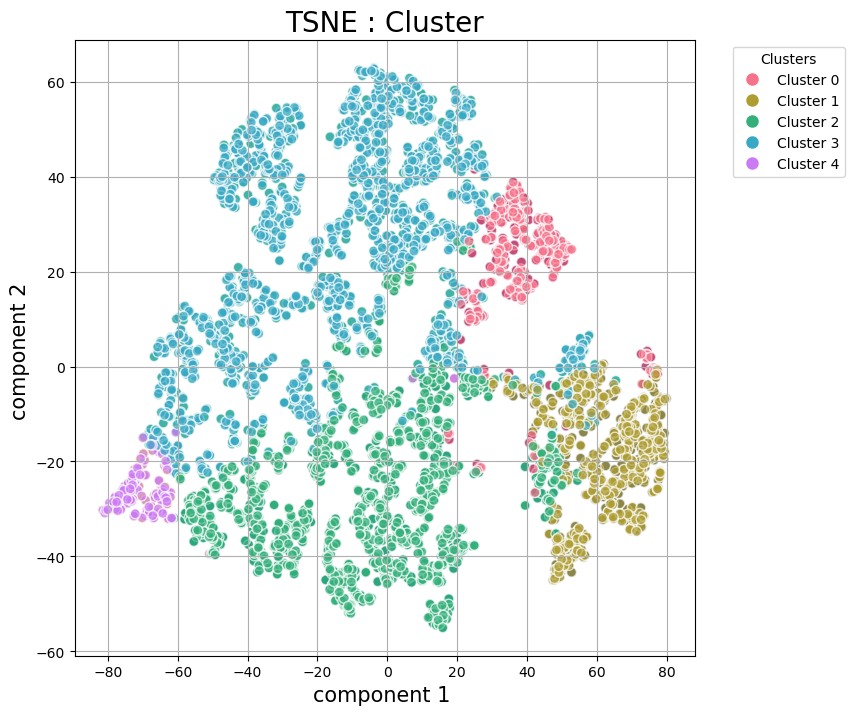

In [127]:
scatter_plot1(tsneDF,'TSNE : Cluster')

**The silhouette score**

Make the necessary imports from scikit learn and compute the silhoutte score.

Read what this score represents and how it is computed here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html and here https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [128]:
from sklearn.metrics import silhouette_score, silhouette_samples

# Calculer les labels de cluster
labels = kmeans.labels_

# Calculer le score de silhouette moyen
silhouette_avg = silhouette_score(df_norm, labels)
print(f"Silhouette Score for 5 clusters: {silhouette_avg}")

Silhouette Score for 5 clusters: 0.010403676072872244


You can read more about other clustering evaluation methods here: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

### Finding the optimal number of clusters

In the following article you will find several [methods](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) for determining the number of clusters.

We will first use the silhouette score for obtaining the optimal number of clusters. Optional: another method you can try is the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) ).


**Use the silhouette analysis to find an optimal number of clusters for the bank clients data.** <u><i>Hint:</u></i> Feel free to use the `n_jobs` hyperparameter to speed up your computation.

An example of silhouette analysis is presented here: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Plot the silhouette scores for 20 different numbers of clusters of your choice.

In [129]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Définir la gamme de nombres de clusters
nb_clusters_trials = range(2, 22)
silhouette_scores = []

# Calculer les scores de silhouette pour chaque nombre de clusters
for nb in nb_clusters_trials:
    kmeans = KMeans(n_clusters=nb, random_state=42).fit(df_norm)
    labels = kmeans.labels_
    score = silhouette_score(df_norm, labels)
    silhouette_scores.append(score)
    print(f'For n_clusters = {nb}, the silhouette score is {score}')

c:\Users\lisia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2, the silhouette score is 0.4000698396681849


c:\Users\lisia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3, the silhouette score is 0.2579041559013381


c:\Users\lisia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4, the silhouette score is 0.27826877475969497


c:\Users\lisia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5, the silhouette score is 0.2969429774419599


c:\Users\lisia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6, the silhouette score is 0.3087780219770303


c:\Users\lisia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7, the silhouette score is 0.3207233697244295


c:\Users\lisia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8, the silhouette score is 0.3230133911100322


c:\Users\lisia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9, the silhouette score is 0.3279230271199456


c:\Users\lisia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10, the silhouette score is 0.3126426356506396


c:\Users\lisia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 11, the silhouette score is 0.3097449731693113


c:\Users\lisia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 12, the silhouette score is 0.23285568318609642


c:\Users\lisia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 13, the silhouette score is 0.23120605383454812


c:\Users\lisia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 14, the silhouette score is 0.23915726986100283


c:\Users\lisia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 15, the silhouette score is 0.2410471368162


c:\Users\lisia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 16, the silhouette score is 0.2449052910766655


c:\Users\lisia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 17, the silhouette score is 0.2435914839293833


c:\Users\lisia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 18, the silhouette score is 0.24278659042373626


c:\Users\lisia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 19, the silhouette score is 0.23399324790039194


c:\Users\lisia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 20, the silhouette score is 0.24195244276216635


c:\Users\lisia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 21, the silhouette score is 0.23244018891604337


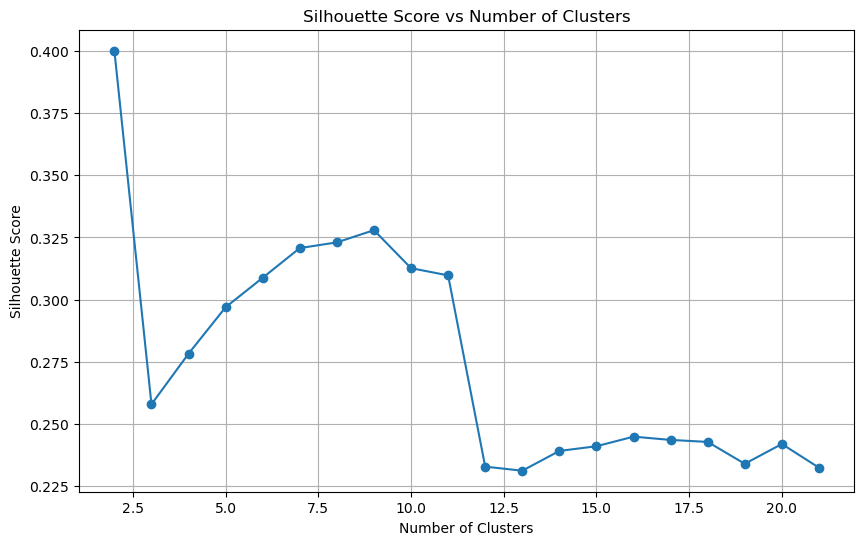

In [130]:
# Plot des scores de silhouette pour visualiser les résultats
plt.figure(figsize=(10, 6))
plt.plot(list(nb_clusters_trials), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

What is the optimal number of clusters that you obtained? 

In [131]:
# Find the optimal number of clusters
optimal_clusters = nb_clusters_trials[np.argmax(silhouette_score)]
print(f"The optimal number of clusters is: {optimal_clusters}")

The optimal number of clusters is: 2


 # "silhouette_plot" and 'run_and_plot_clustering' functions:
- 'silhouette_plot': This function generates a silhouette plot, which visualizes how well-separated the clusters are.
- "run_and_plot_clustering" : This function applies a clustering algorithm, reduces dimensions using PCA and t-SNE, and then plots the results including the silhouette plot.

In [132]:
# Définir la fonction silhouette_plot
import matplotlib.cm as cm
def silhouette_plot(X, cluster_labels, n_clusters, title):
    
    fig = plt.figure(figsize = (8,8))
    ax1 = fig.add_subplot(1,1,1) 
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(title)
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


In [133]:
def scatter_plot(principalDF, title):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('component 1 ',fontsize = 15)
    ax.set_ylabel('component 2 ',fontsize = 15)
    ax.set_title(title, fontsize = 20)

    ax.scatter(principalDF.iloc[:,0], principalDF.iloc[:,1],c = principalDF.iloc[:,2])
    ax.grid()

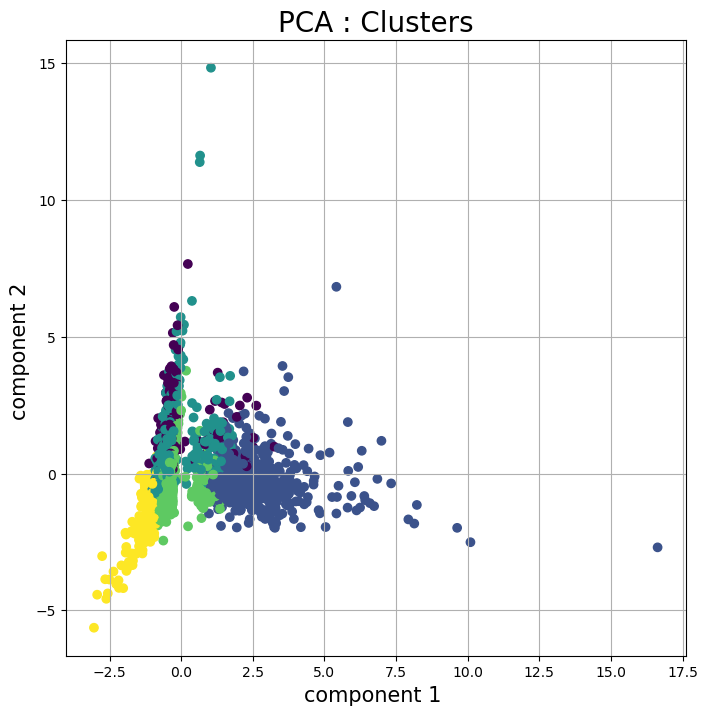

In [134]:
scatter_plot(principalDF, 'PCA : Clusters')

In [138]:
 #Définir la fonction run_and_plot_clustering
from seaborn import scatterplot


def run_and_plot_clustering(data, model, model_name, preprocessor, preproc_name ):
    data_preproc = preprocessor.fit_transform(data)
    clusters = model.fit_predict(data_preproc)
    
    nb_clusters = max(model.labels_)+1
    
    sil_score = silhouette_score(data_preproc, clusters)
    
    reduced_data = PCA(n_components=2).fit_transform(data_preproc)
    principalDF = pd.DataFrame(data = reduced_data,
                               columns = ['pc 1', 'pc 2'])
    principalDF["cluster label"] = clusters
    
    scatter_plot(principalDF, "PCA : " +model_name + ' K='+str(nb_clusters) +
                 ' with ' + preproc_name + ", sil_score={:.2f}".format(sil_score))

    # Project the data: this step will take several seconds
    tsne = TSNE(n_components=2, init='random', random_state=0)
    projected_tsne = tsne.fit_transform(data_preproc)
    tsneDf = pd.DataFrame(data = projected_tsne,
                               columns = ['tsne 1', 'tsne 2'])
    tsneDf["cluster label"] = clusters
    scatter_plot(tsneDf, "TSNE : " +model_name + ' K='+str(nb_clusters) +
                 ' with ' + preproc_name + ", sil_score={:.2f}".format(sil_score))

    silhouette_plot(data_preproc, clusters, nb_clusters, title = "Silhouette plot : " 
                    +model_name + ' K='+str(nb_clusters) 
                    +' with ' + preproc_name + ", sil_score={:.2f}".format(sil_score))

In [139]:
 # Échantillonner les données
unscaled_sample_df = df.sample(frac=0.1)

unscaled_sample_df

,age,balance,duration,campaign,pdays,previous
26100,40,3352,639,2,27,1
19823,47,405,994,2,-1,0
29303,37,-1,223,2,200,7
33403,31,1660,342,1,-1,0
21209,45,0,773,4,-1,0
...,...,...,...,...,...,...
3150,57,3105,173,11,-1,0
41084,36,1228,153,2,102,3
36867,32,0,61,4,-1,0
10288,55,3664,423,2,-1,0


c:\Users\lisia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


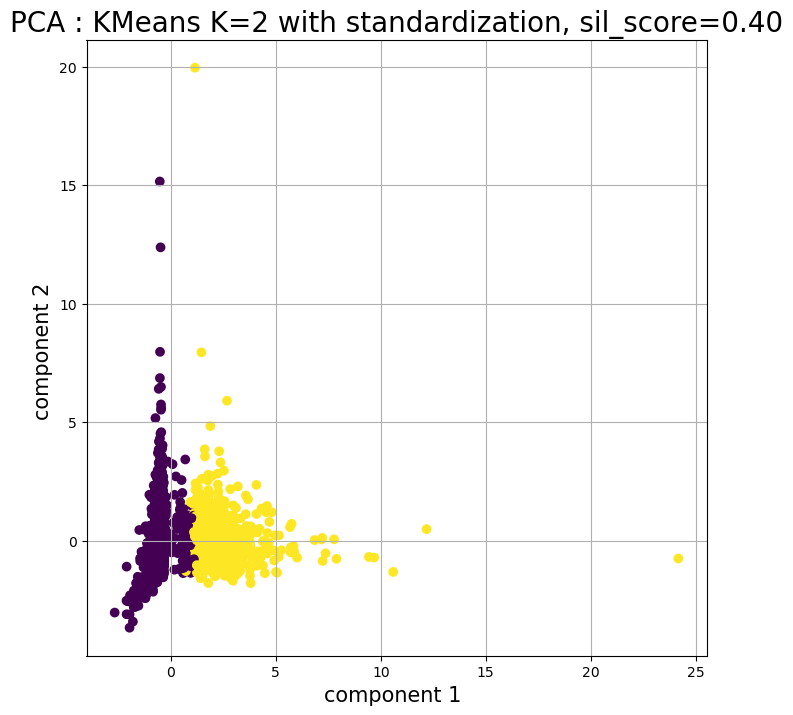

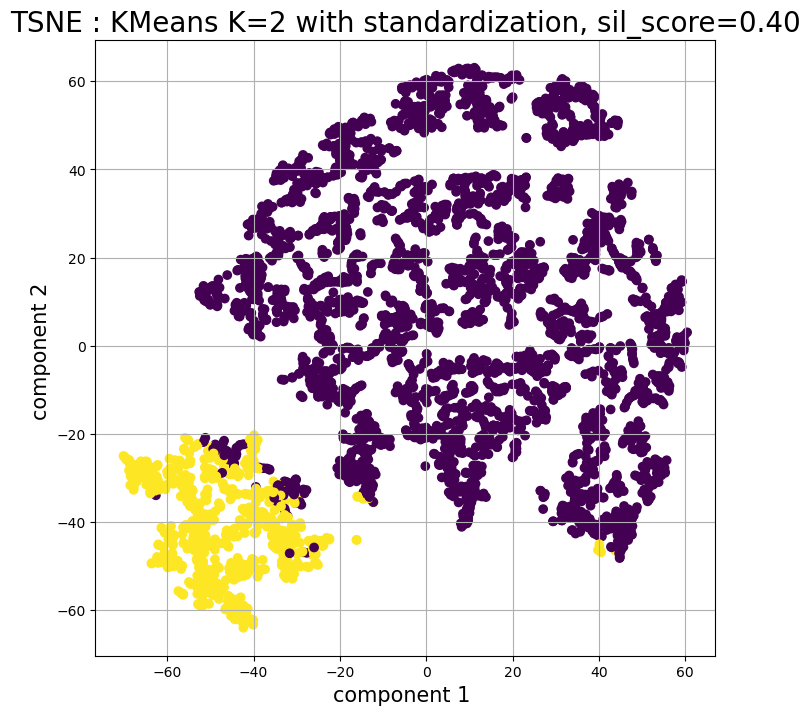

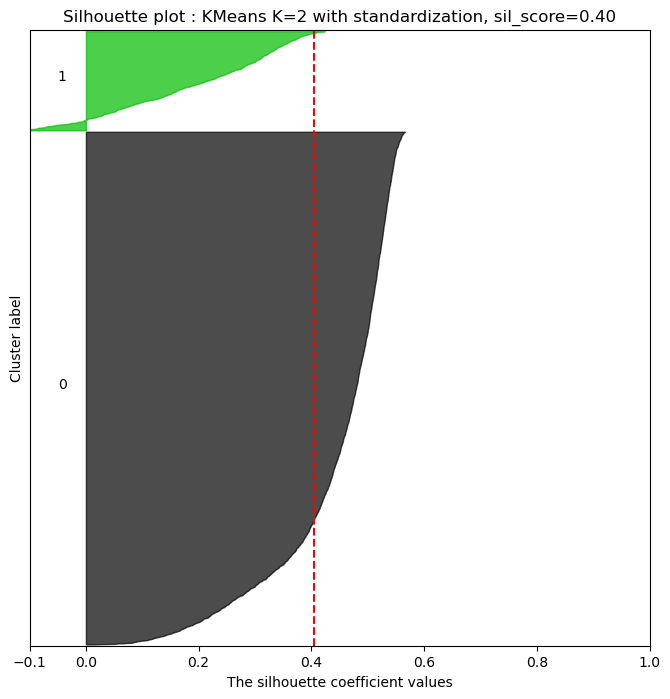

In [140]:
preproc = StandardScaler()
kmeans = KMeans(n_clusters=2)

run_and_plot_clustering(unscaled_sample_df, kmeans, "KMeans", preproc, "standardization")

In [3]:
unscaled_sample_df = df.sample(frac=0.1)

NameError: name 'df' is not defined

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering

preprocessor = [StandardScaler(), MinMaxScaler(), Normalizer()]
preproc_names = ['StandardScaler', 'MiniMaxScaler', 'Normalizer']

nb_clusters = 2
models = [KMeans(n_clusters= nb_clusters), SpectralClustering(n_clusters=nb_clusters)]
model_names = ["kmeans", "SpectralClustering"]

for i in range(len(models)):
    for j in range(len(preprocessor)):
        run_and_plot_clustering(unscaled_sample_df, models[i], model_names[i], preprocessor[j],preproc_names[j])

NameError: name 'run_and_plot_clustering' is not defined

## Hierarchical Clustering

Let's try to apply now a different method on the same data. You can find more explanations on hierarchical clustering in the links in section Resources D. Hierarhchical clustering:
 * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
 * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
 * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

Make the necessary imports from scikit learn to perform hierarchical clustering. 

Start by plotting the dendrogram and deciding the number of clusters. Then apply hierarchical clustering.

You might find this useful: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html for creating the dendrogram.

Summary:
Hierarchical Clustering: Use linkage to compute the hierarchical clustering and fcluster to assign cluster labels.
silhouette_plot: Visualize the silhouette scores to evaluate cluster quality.
run_and_plot_clustering: Apply clustering, reduce dimensions, and plot results including silhouette scores.

Compare the kmeans labels with the labels obtained by the hierarchical clustering.

In [ ]:
#code here

### Application: clustering images

Theses techniques can be use to reduce the number of colours in a picture

- find a picture you want to reduce the number of colours.
- use `skimages` and `sklearn` to reduce the number of colours in this picture
- from your picture create two pictures with 16 colours what do you notice?

Now let's try to apply KMeans clustering on the simple digits data that can be loaded from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

The goal is to use KMeans to try to identify similar digits without using the original label information.

Start by loading the digits and then finding the KMeans clusters. The digits data consists of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image.

In [ ]:
# code here

The cluster centroids themselves are 64-dimensional points, and can thus be interpreted as the "typical" digit within the cluster. Plot each cluster center. Hint: use *imshow*

In [ ]:
# code here

For each of the data points we also have access to their real labels (using *digits.target*). This means we can verify if the clustering algorithm split the data in such a way as to predict the original classes. 

Note that the labels of the discovered clusters may not directly match the initial labels in the dataset (they could be permuted). Write code to match each learned cluster label with the true labels of the data found in them.

In [ ]:
# code here

Now compute the accuracy score between the true labels from the data and the predicted ones.

In [ ]:
# code here

Plot the confusion matrix between the predicted labels and the actual labels. Which were the digits that were most often confused with other digits?

In [ ]:
# code here

What if instead of keeping the original 64 features, we perform a projection into 2 dimensions?
Use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to pre-process the data before performing KMeans. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters.

Compute the new accuracy.

In [ ]:
# code here